In [64]:
import matplotlib.pyplot as plt
import keras
from keras import layers,models
import tensorflow as tf
import numpy as np
import joblib

In [2]:
IMG_SIZE=120
BATCH_SIZE=32

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("Dataset/plant/train/",seed=10,
                                                            batch_size=BATCH_SIZE,image_size=[IMG_SIZE,IMG_SIZE])

Found 804 files belonging to 5 classes.


In [65]:
class_names=dataset.class_names
joblib.dump(class_names,'crop_names.pkl')
print(class_names)

['jute', 'maize', 'rice', 'sugarcane', 'wheat']


<Figure size 720x720 with 0 Axes>

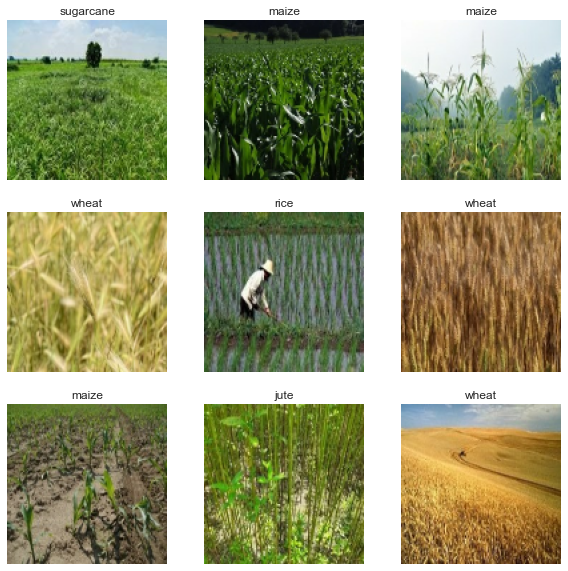

In [5]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn')
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

In [6]:
print(len(dataset))


26


### Train Test Split

In [7]:
def test_train_split(dataset,train_per=0.8,valid_per=0.2):
    n=len(dataset)
    train_len=int(n*train_per)
    train_ds=dataset.take(train_len)
    data=dataset.skip(train_len)
#     test_len=int(n*test_per)
#     test_ds=data.take(test_len)
#     valid_ds=data.skip(test_len)
    return train_ds,data

In [8]:
train_ds,valid_ds=test_train_split(dataset,0.8,0.2)

In [10]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory("Dataset/plant/test/",seed=10,
                                                            batch_size=BATCH_SIZE,image_size=[IMG_SIZE,IMG_SIZE])

Found 201 files belonging to 5 classes.


In [11]:
print(len(train_ds))
print(len(test_ds))
print(len(valid_ds))

20
7
6


In [12]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
vaidl_ds = valid_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

### Augmentation

In [41]:
data_augmentation = models.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [42]:
input_shape=(BATCH_SIZE,IMG_SIZE,IMG_SIZE,3)
n_classes=len(dataset.class_names)
print(n_classes)

5


In [48]:

model=models.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE),
    layers.Rescaling(1.0/255),
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu',padding='same'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(n_classes, activation='softmax')
]
)

In [49]:
model.build(input_shape=input_shape)

In [50]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_5 (Resizing)       (32, 120, 120, 3)         0         
                                                                 
 rescaling_5 (Rescaling)     (32, 120, 120, 3)         0         
                                                                 
 sequential_6 (Sequential)   (None, 120, 120, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (32, 120, 120, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (32, 60, 60, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (32, 60, 60, 64)          18496     
                                                      

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [52]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=valid_ds,
    verbose=1,
    epochs=100,
)

Epoch 1/100
20/20 [==============================] - 11s 515ms/step - loss: 1.6202 - accuracy: 0.1891 - val_loss: 1.6018 - val_accuracy: 0.2195
Epoch 2/100
20/20 [==============================] - 10s 486ms/step - loss: 1.5626 - accuracy: 0.2500 - val_loss: 1.4529 - val_accuracy: 0.3415
Epoch 3/100
20/20 [==============================] - 11s 529ms/step - loss: 1.4819 - accuracy: 0.3344 - val_loss: 1.4047 - val_accuracy: 0.3354
Epoch 4/100
20/20 [==============================] - 11s 526ms/step - loss: 1.4155 - accuracy: 0.3703 - val_loss: 1.3783 - val_accuracy: 0.4878
Epoch 5/100
20/20 [==============================] - 10s 520ms/step - loss: 1.3571 - accuracy: 0.4219 - val_loss: 1.2294 - val_accuracy: 0.5183
Epoch 6/100
20/20 [==============================] - 11s 527ms/step - loss: 1.3126 - accuracy: 0.4500 - val_loss: 1.2578 - val_accuracy: 0.4939
Epoch 7/100
20/20 [==============================] - 10s 517ms/step - loss: 1.2530 - accuracy: 0.5078 - val_loss: 1.1601 - val_accuracy:

20/20 [==============================] - 11s 527ms/step - loss: 0.3941 - accuracy: 0.8500 - val_loss: 0.3682 - val_accuracy: 0.8720
Epoch 58/100
20/20 [==============================] - 10s 515ms/step - loss: 0.3472 - accuracy: 0.8547 - val_loss: 0.2878 - val_accuracy: 0.8902
Epoch 59/100
20/20 [==============================] - 10s 525ms/step - loss: 0.3648 - accuracy: 0.8516 - val_loss: 0.3497 - val_accuracy: 0.8415
Epoch 60/100
20/20 [==============================] - 11s 549ms/step - loss: 0.4282 - accuracy: 0.8281 - val_loss: 0.3330 - val_accuracy: 0.8780
Epoch 61/100
20/20 [==============================] - 10s 517ms/step - loss: 0.3571 - accuracy: 0.8797 - val_loss: 0.3479 - val_accuracy: 0.8720
Epoch 62/100
20/20 [==============================] - 11s 529ms/step - loss: 0.4163 - accuracy: 0.8203 - val_loss: 0.2029 - val_accuracy: 0.9573
Epoch 63/100
20/20 [==============================] - 10s 523ms/step - loss: 0.4385 - accuracy: 0.8219 - val_loss: 0.2349 - val_accuracy: 0.939

In [53]:
print(model.evaluate(test_ds))
print(model.evaluate(valid_ds))
print(model.evaluate(train_ds))

7/7 [==============================] - 1s 90ms/step - loss: 0.3206 - accuracy: 0.8955
[0.32059794664382935, 0.89552241563797]
6/6 [==============================] - 1s 85ms/step - loss: 0.2927 - accuracy: 0.9207
[0.29271796345710754, 0.9207317233085632]
20/20 [==============================] - 2s 98ms/step - loss: 0.2534 - accuracy: 0.9141
[0.25341665744781494, 0.9140625]


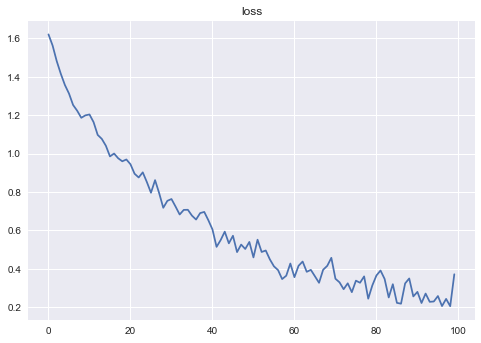

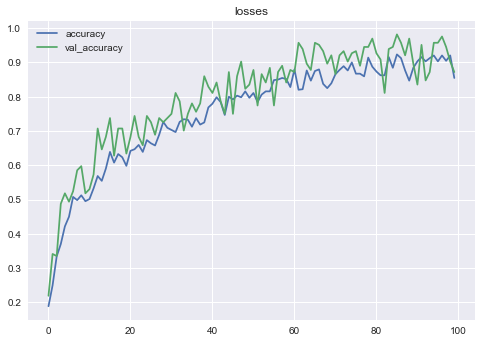

In [54]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('losses')
plt.show()


model=models.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE),
    layers.Rescaling(1.0/255),
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
]
)

In [55]:
def predict(img):
    img=img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    arr=model.predict(img)
    ind=np.argmax(arr)
    names=joblib
    return dataset.class_names[ind]

maize


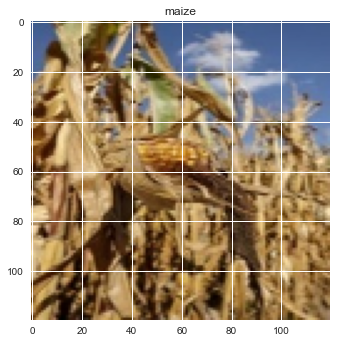

maize


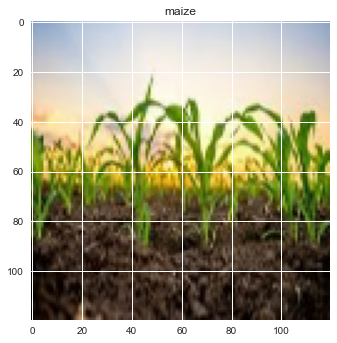

jute


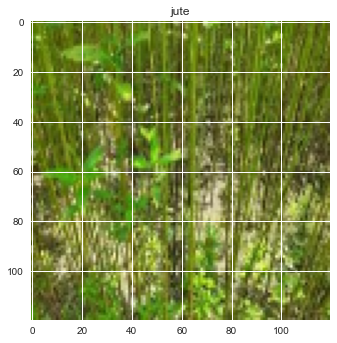

sugarcane


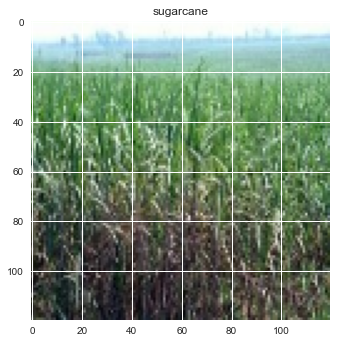

sugarcane


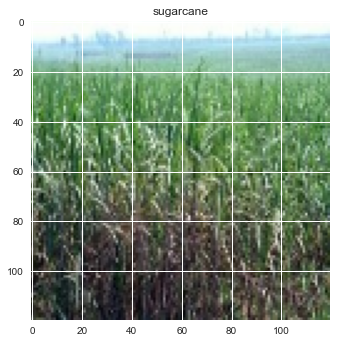

sugarcane


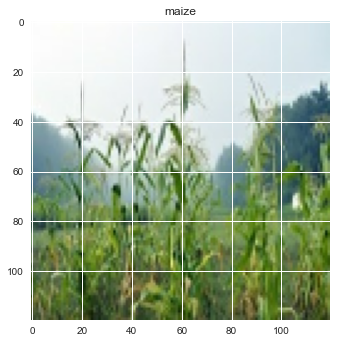

maize


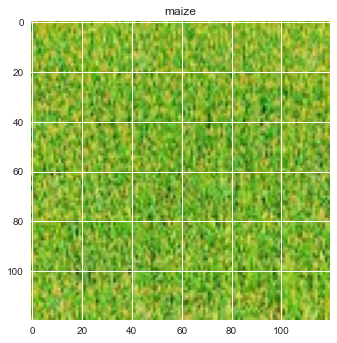

jute


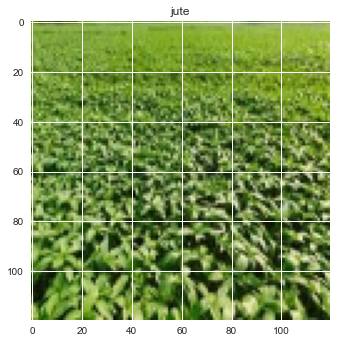

maize


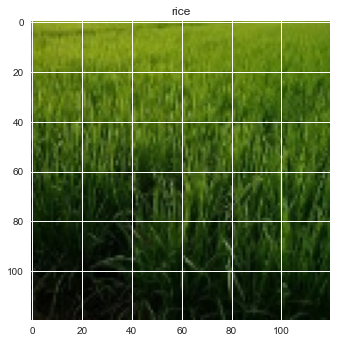

sugarcane


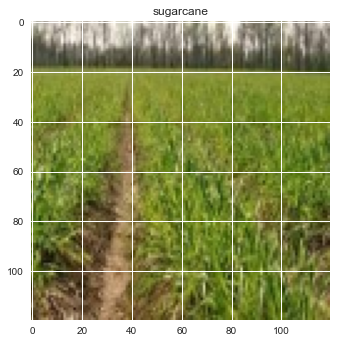

rice


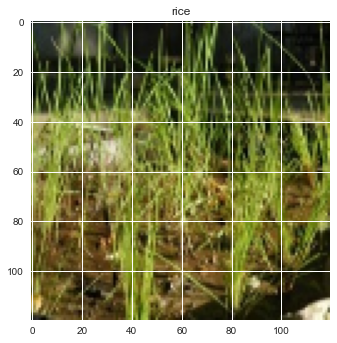

rice


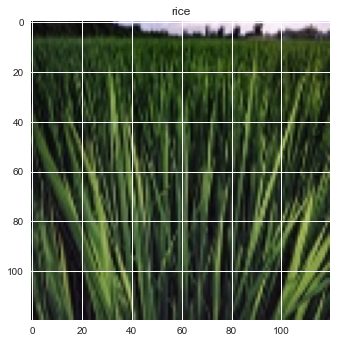

sugarcane


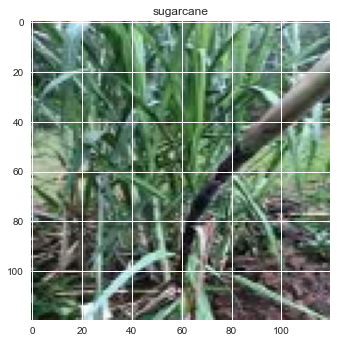

rice


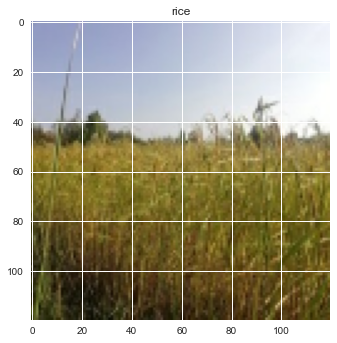

rice


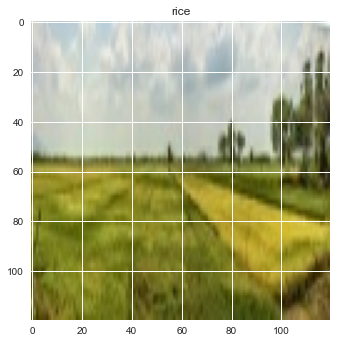

wheat


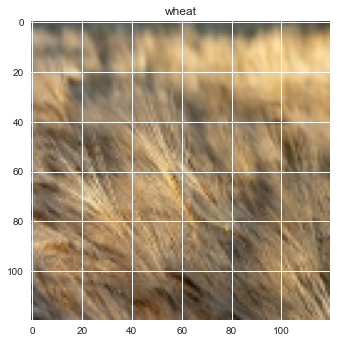

rice


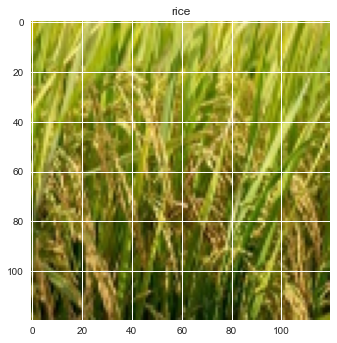

wheat


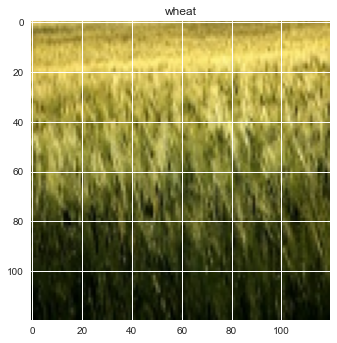

maize


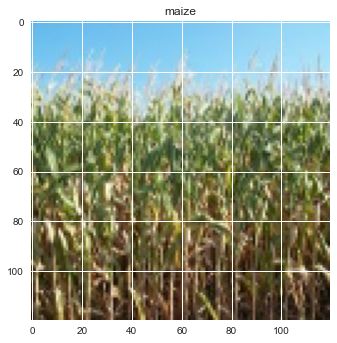

maize


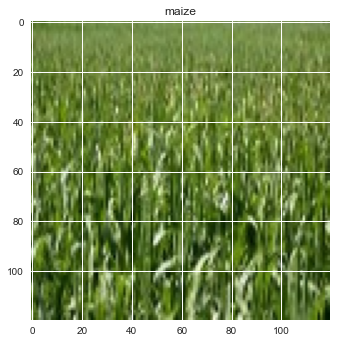

rice


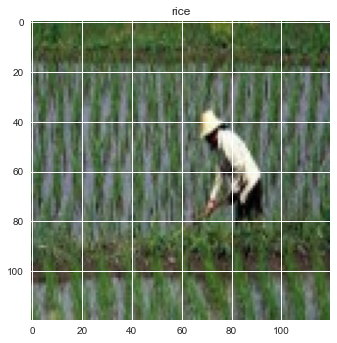

wheat


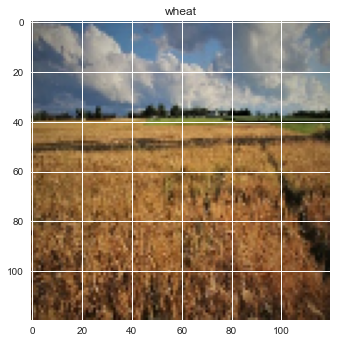

jute


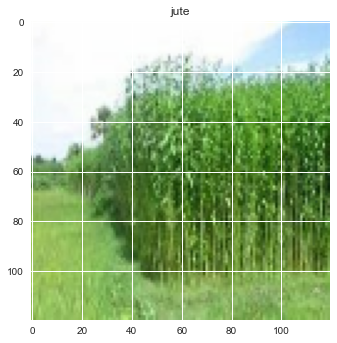

maize


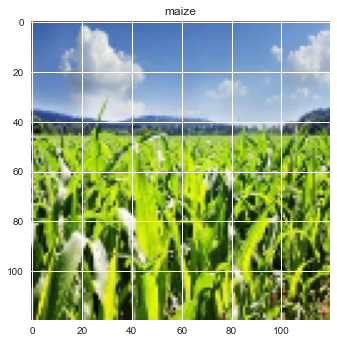

sugarcane


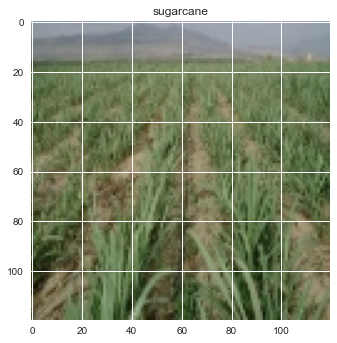

wheat


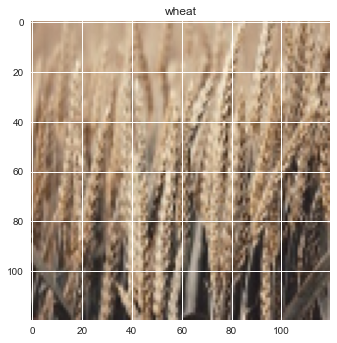

wheat


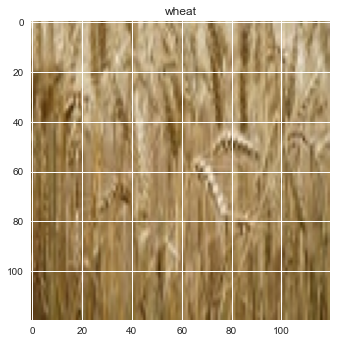

sugarcane


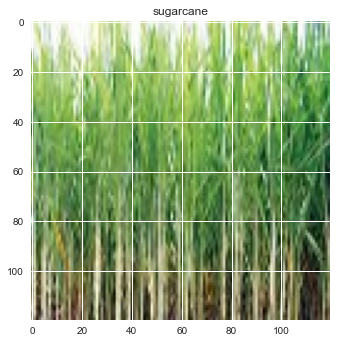

sugarcane


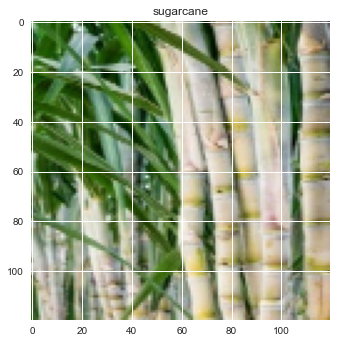

sugarcane


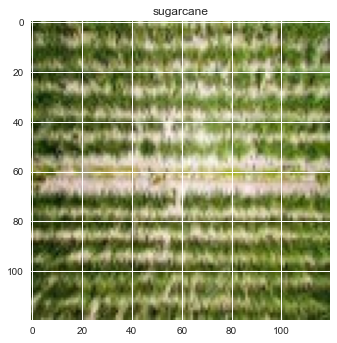

sugarcane


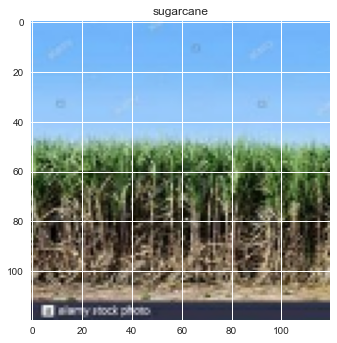

rice


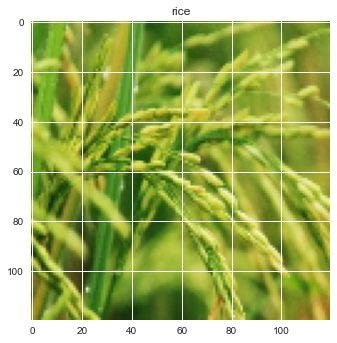

In [56]:
for images,label in test_ds.take(1):
    for i in range(len(images)):
#         print(x.shape)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        print(predict(images[i].numpy()))
        plt.show()

        
    
    

In [57]:
from keras.models import model_from_json

In [58]:
model_json = model.to_json()
with open("crop_recognize.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("crop_recognize.h5")

In [59]:
json_file = open('crop_recognize.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("crop_recognize.h5")

In [60]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [61]:
print(type(loaded_model))

<class 'keras.engine.sequential.Sequential'>


In [62]:
loaded_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [63]:
print(loaded_model.evaluate(test_ds))
print(loaded_model.evaluate(valid_ds))
print(loaded_model.evaluate(train_ds))

7/7 [==============================] - 1s 98ms/step - loss: 0.3206 - accuracy: 0.8955
[0.32059794664382935, 0.89552241563797]
6/6 [==============================] - 1s 91ms/step - loss: 0.2401 - accuracy: 0.9146
[0.24005226790905, 0.9146341681480408]
20/20 [==============================] - 2s 105ms/step - loss: 0.2534 - accuracy: 0.9141
[0.25341665744781494, 0.9140625]


In [26]:
from PIL import Image

In [12]:
print(loaded_model.evaluate(test_ds))

1/1 [==============================] - 2s 2s/step - loss: 26.8653 - accuracy: 0.0000e+00
[26.865278244018555, 0.0]


In [33]:
im=Image.open("Dataset/plant_disease/test/Tomato__Septoria_leaf_spot/WhatsApp Image 2022-05-18 at 12.37.31 AM.jpeg")

In [34]:
im=im.resize((120,120))
im=np.array(im)

In [35]:
im.shape

(120, 120, 3)

In [36]:
print(predict(im))

Tomato___Septoria_leaf_spot
